# EXPOLARATORY ANALYSIS
In this jupyter notebook we will expolore the dataset obtained. In particular we'll focus on: 
1. **Seasonal plot**: basic plotting, year-wise box plot for trend, month_wise box plot for seasonality,
2. **A few metrics**:  average daily yearly and quaterly, mean and std, median close price and 10th percentile and 90th percentile
3. **Correlation and autocorrelation on PCT change**
4. **Test for random walk by applying regression model**

## Seasonal plot

First, we create **time related columns** in the original data as follows:

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# Take data
with open('sp500_data_original.pkl', 'rb') as f:
    sp500_data = pickle.load(f)

# Create time like columns
sp500_data['Year'] = sp500_data['Date'].dt.year
sp500_data['Month'] = sp500_data['Date'].dt.month
sp500_data['Day'] = sp500_data['Date'].dt.day
sp500_data['Weekday'] = sp500_data['Date'].dt.day_name()
sp500_data['Quarter'] = sp500_data['Date'].dt.quarter


### Seasonal plot
Now we create a **seasona plot**

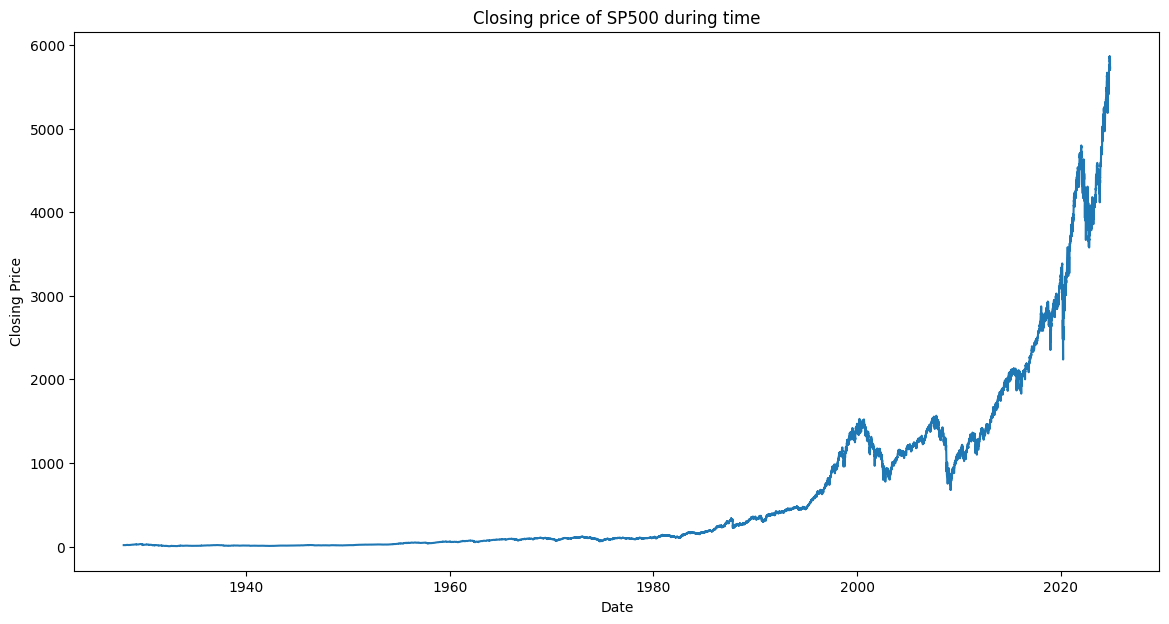

In [5]:
# Tracciare il prezzo di chiusura nel tempo
plt.figure(figsize=(14,7))
plt.plot(sp500_data['Date'], sp500_data['Close'])
plt.title('Closing price of SP500 during time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


### Year wise boxplot 